In [1]:
%matplotlib inline
#import sys
#sys.path.append(r'C:\Users\festa\OneDrive\Desktop\Thesis\Thesis\functions')
from functions import load_and_process_data, apply_bias_mitigation, evaluate_fairness_metrics, standardize_features, train_classifier_and_find_best_threshold, apply_best_threshold_and_compute_metrics, plot_metrics, train_classifier_on_transformed_data, extract_fairness_metrics


KeyboardInterrupt: 

In [15]:
#TODO: call MEPS for dir
#should test all of them
#these are the originals
train, val, test, privileged_groups, unprivileged_groups = load_and_process_data('adult', use_disparate_impact_remover=False)

In [16]:
# For Reweighing
train_transf, test_transf = apply_bias_mitigation('reweighing', train, test, unprivileged_groups, privileged_groups)

# For LFR
#train_transf, test_transf = apply_bias_mitigation('lfr', train, test, unprivileged_groups, privileged_groups)

# For OptimPreproc
#train_transf, test_transf = apply_bias_mitigation('optimpreproc', train, test, unprivileged_groups, privileged_groups)

# For DisparateImpactRemover
#train_transf, test_transf = apply_bias_mitigation('disparateimpactremover', train, test, unprivileged_groups, privileged_groups)


In [17]:
train_before_stat_parity_diff, train_before_disp_impact = evaluate_fairness_metrics(train, unprivileged_groups, privileged_groups, "Train Dataset (Before Transformation)")
test_before_stat_parity_diff, test_before_disp_impact = evaluate_fairness_metrics(test, unprivileged_groups, privileged_groups, "Test Dataset (Before Transformation)")

train_after_stat_parity_diff, train_after_disp_impact = evaluate_fairness_metrics(train_transf, unprivileged_groups, privileged_groups, "Train Dataset (After Transformation)")
test_after_stat_parity_diff, test_after_disp_impact = evaluate_fairness_metrics(test_transf, unprivileged_groups, privileged_groups, "Test Dataset (After Transformation)")

print("Train Dataset (Before Transformation) - Statistical Parity Difference:", train_before_stat_parity_diff)
print("Train Dataset (Before Transformation) - Disparate Impact:", train_before_disp_impact)
print("Test Dataset (Before Transformation) - Statistical Parity Difference:", test_before_stat_parity_diff)
print("Test Dataset (Before Transformation) - Disparate Impact:", test_before_disp_impact)

print("Train Dataset (After Transformation) - Statistical Parity Difference:", train_after_stat_parity_diff)
print("Train Dataset (After Transformation) - Disparate Impact:", train_after_disp_impact)
print("Test Dataset (After Transformation) - Statistical Parity Difference:", test_after_stat_parity_diff)
print("Test Dataset (After Transformation) - Disparate Impact:", test_after_disp_impact)


Train Dataset (Before Transformation) - Statistical Parity Difference: -0.1951
Train Dataset (Before Transformation) - Disparate Impact: 0.3572
Test Dataset (Before Transformation) - Statistical Parity Difference: -0.1893
Test Dataset (Before Transformation) - Disparate Impact: 0.3812
Train Dataset (After Transformation) - Statistical Parity Difference: 0.0000
Train Dataset (After Transformation) - Disparate Impact: 1.0000
Test Dataset (After Transformation) - Statistical Parity Difference: 0.0132
Test Dataset (After Transformation) - Disparate Impact: 1.0546


In [18]:
# Standardize the features (scaling)
train, val, test = standardize_features(train, val, test)

# Choose classifier type
classifier_type = 'logistic_regression'  # Change to 'random_forest' or 'xgboost'

# Step 1: Train classifier
classifier, best_threshold, best_balanced_acc = train_classifier_and_find_best_threshold(train, val, classifier_type, unprivileged_groups, privileged_groups)


Best Threshold: 0.22
Best Balanced Accuracy: 0.750658189919502


In [19]:
test_metrics, test_scores = apply_best_threshold_and_compute_metrics(classifier, test, best_threshold, unprivileged_groups, privileged_groups)

Balanced Accuracy (test): 0.7301993384418746
Statistical Parity Difference (test): -0.3952836868360807
Disparate Impact (test): 0.26208682736058364
Average Odds Difference (test): -0.34080102302051685
Equal Opportunity Difference (test): -0.36783535437222264
Theil Index (test): 0.11469950874717495


In [ ]:
plot_metrics(test, test_scores, best_threshold, unprivileged_groups, privileged_groups)


Balanced Accuracy (test transformed): 0.7078205979911509
Statistical Parity Difference (test transformed): -0.01143584596876418
Disparate Impact (test transformed): 0.9759671958259325
Average Odds Difference (test transformed): -0.006045671631869115
Equal Opportunity Difference (test transformed): 0.015694433983580613
Theil Index (test transformed): 0.11151661002392621


c:\Users\festa\AppData\Local\Programs\Python\Python312\Lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


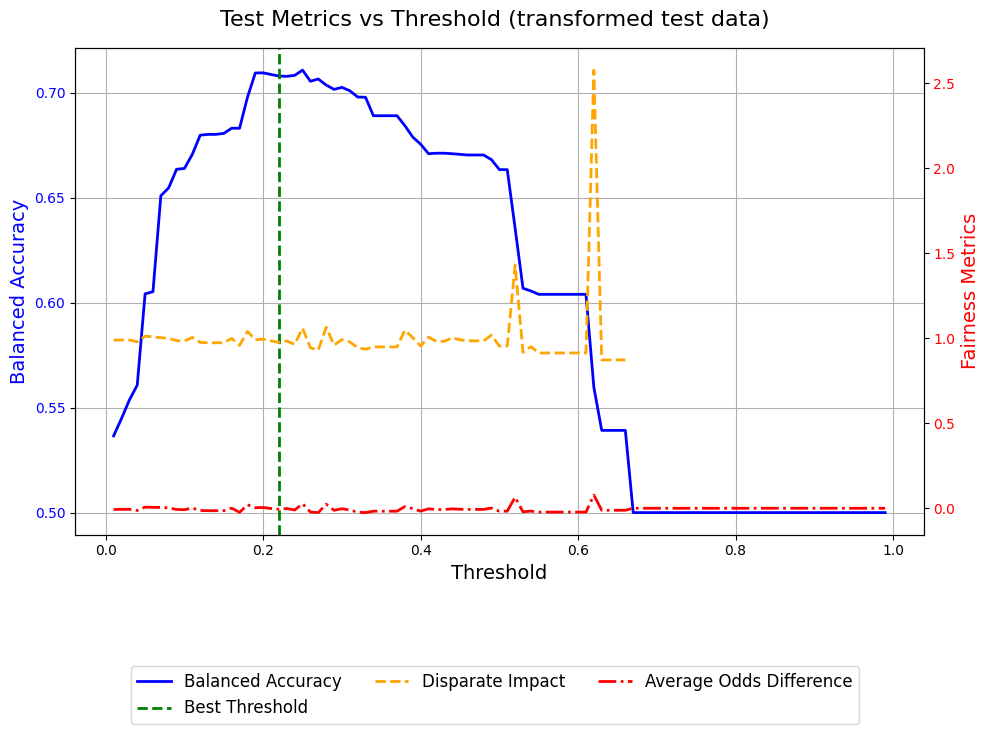

In [21]:
# Standardize the features (scaling)
train_transf, _ , test_transf = standardize_features(train_transf, val, test_transf)

# Train classifier on transformed data and use the same threshold
classifier_type = 'logistic_regression'  # Change to 'random_forest' or 'xgboost'
test_transf_classifier, test_transf_scores, test_transf_metrics = train_classifier_on_transformed_data(
    train_transf, test_transf, classifier_type, best_threshold, unprivileged_groups, privileged_groups)

# Plot metrics for transformed test data
plot_metrics(test_transf, test_transf_scores, best_threshold, unprivileged_groups, privileged_groups)

In [22]:
fairness_metrics, validation_metrics, test_metrics = extract_fairness_metrics(
    train_before_stat_parity_diff, train_after_stat_parity_diff,
    test_before_stat_parity_diff, test_after_stat_parity_diff,
    train_before_disp_impact, train_after_disp_impact,
    test_before_disp_impact, test_after_disp_impact,
    best_threshold, best_balanced_acc,
    test_metrics, test_transf_metrics
)

# Displaying the tables
for table in [fairness_metrics, validation_metrics, test_metrics]:
    display(table.name)
    display(table)


'Fairness Metrics Before and After Transformation'

,Dataset,Stage,Metric,Value
0,Train,Before Transformation,Statistical Parity Difference,-0.1951
1,Train,After Transformation,Statistical Parity Difference,0.0000
2,Test,Before Transformation,Statistical Parity Difference,-0.1893
3,Test,After Transformation,Statistical Parity Difference,0.0132
4,Train,Before Transformation,Disparate Impact,0.3572
5,Train,After Transformation,Disparate Impact,1.0000
6,Test,Before Transformation,Disparate Impact,0.3812
7,Test,After Transformation,Disparate Impact,1.0546


'Validation Metrics for Threshold Selection'

,Dataset,Stage,Metric,Value
0,Validation,Best Threshold (Validation),Threshold,0.220000
1,Validation,Best Threshold (Validation),Balanced Accuracy,0.750658


'Test Metrics After Applying Threshold On Original and Transformed'

,Dataset,Stage,Metric,Value
0,Test (Original),After Threshold,Balanced Accuracy,0.730199
1,Test (Transformed),After Threshold,Balanced Accuracy,0.707821
2,Test (Original),After Threshold,Statistical Parity Difference,-0.395284
3,Test (Transformed),After Threshold,Statistical Parity Difference,-0.011436
4,Test (Original),After Threshold,Disparate Impact,0.262087
5,Test (Transformed),After Threshold,Disparate Impact,0.975967
6,Test (Original),After Threshold,Average Odds Difference,-0.340801
7,Test (Transformed),After Threshold,Average Odds Difference,-0.006046
8,Test (Original),After Threshold,Equal Opportunity Difference,-0.367835
9,Test (Transformed),After Threshold,Equal Opportunity Difference,0.015694
